# Learning From Data Excercises 


## Exercise 1.2
Suppose that we use a perceptron to detect spam messages. Let's say that each email message is represented by the frequency of occurrence of keywords, and the output is $+1$ if the message is considered spam.

(a) Can you think of some keywords that will end up with a large positive weight in the perceptron?

(b) How about keywords that will get a negative weight?

(c) What parameter in the perceptron directly affects how many borderline messages end up being classified as spam?


## Solution

(a) Discount, free, update, horoscope, gift.

(b) Respectfully, document, requested.

(c) The bias unit or constant parameter in the perceptron (b), directly affects the number of borderline messages that end up being classified as spam, because it's the threshold that determines how the messages are classified by the perceptron model. Modifying it has the same effect on the classification of borderline messages that are equally distat from the initial straight line model of the perceptron. 

## Exercise 1.3
The weight update rule in (1.3) has the nice interpretation that it moves in the direction of classifying $\mathbf{x}(t)$ correctly.

(a) Show that $y(t) \mathbf{w}^{\mathrm{T}}(t) \mathbf{x}(t)<0$. [Hint: $\mathbf{x}(t)$ is misclassified by $\mathbf{w}(t)$.]

(b) Show that $y(t) \mathbf{w}^{\mathrm{T}}(t+1) \mathbf{x}(t)>y(t) \mathbf{w}^{\mathrm{T}}(t) \mathbf{x}(t)$. [Hint: Use (1.3).]

(c) As far as classifying $\mathbf{x}(t)$ is concerned, argue that the move from $\mathbf{w}(t)$ to $\mathrm{w}(t+1)$ is a move 'in the right direction'.

## Solution

(a) Let $t$ be an iteration of the perceptron algorithm in which $x(t)$ is misclassified, i.e., $sign(w(t)^Tx(t))\neq y(t)$. As y(t) is either $1$ or $-1$, this implies that $y(t)w(t)^Tx(t)<0$.

(b) The updated weight in the iteration $t+1$ is

$$w(t+1)=w(t)+y(t)x(t),$$

which means that

$$\begin{align*}
y(t)w(t+1)^Tx(t)&=y(t)(w(t)^Tx(t)+y(t)x(t)^Tx(t)), \\
&=y(t)w(t)^Tx(t)+ y(t)^2x(t)^Tx(t),\\
&=y(t)w(t)^Tx(t)+ x(t)^Tx(t),\\
&>y(t)w(t)^Tx(t).
\end{align*}
$$

(c) For the algorithm to correctly classify some example $x(t)$ at iteration $t$ it has to be the case that $sign(w(t)^Tx(t))= y(t)$, which in this context (because of the set in which $y(t)$ lies), is equivalent to having $y(t)w(t)^Tx(t)>0$. So, as $y(t)w(t+1)^Tx(t)>y(t)w(t)^Tx(t)$ whenever $x(t)$ is misclassified at instant $t$, we conclude that the algorithm makes a step in the right direction as far as classifying the example it selects at each iteration. 


## Exercise 1.10
Here is an experiment that illustrates the difference between a single bin and multiple bins. Run a computer simulation for flipping 1,000 fair coins. Flip each coin independently 10 times. Let's focus on 3 coins as follows: $c_{1}$ is the first coin flipped; $c_{\text {rand }}$ is a coin you choose at random; $c_{\min }$ is the coin that had the minimum frequency of heads (pick the earlier one in case of a tie). Let $\nu_{1}, \nu_{\text {rand }}$ and $\nu_{\min }$ be the fraction of heads you obtain for the respective three coins.

(a) What is $\mu$ for the three coins selected?

(b) Repeat this entire experiment a large number of times (e.g., 100, 000 runs of the entire experiment) to get several instances of $\nu_{1}$, $\nu_{\text {rand }}$ and $\nu_{\min }$ and plot the histograms of the distributions of $\nu_{1}, \nu_{\text {rand }}$ and $\nu_{\min }$. Notice that which coins end up being $c_{\text {rand }}$ and $c_{\min }$ may differ from one run to another.

(c) Using (b), plot estimates for $\mathbb{P}[|\nu-\mu|>\epsilon]$ as a function of $\epsilon$, together with the Hoeffding bound $2 e^{-2 \epsilon^{2} N}$ (on the same graph).

(d) Which coins obey the Hoeffding bound, and which ones do not? Explain why.

(e) Relate part (d) to the multiple bins in Figure 1.10.


## Solution

In [1]:
# Collection of Packages for this exercise 

#=
using Pkg

Pkg.add("Plots")
Pkg.add("DataFrames")
Pkg.add("GR")
Pkg.add("LaTeXStrings")

=#

We implement the following code for flipping 1000 fair coins and getting coins $c_1$, $c_{rand}$ and $c_{min}$.

In [2]:
function flip_coins(n_coins, n_flips)
    """
    Flips coins n_flips times each. Returns R, array of arrays of results of each coin
    Arguments:
    n_coins=number of coins
    n_flips=number of flips per coin
    """   
    R=[[i] for i in 1:n_coins]

    for i in 1:n_coins
        
        coin_i = zeros(n_flips) #head: 1, tail: 0
        probs = rand(n_flips)
        
        for j in 1:length(probs)
           if probs[j]>=0.5
           coin_i[j]=1        
           end            
        end
        
        R[i]=coin_i
        
    end
    
    return R
end;



#Getting frequence of heads of a coin from 
function head_num(fl_coins, ncoin)
    "
    Returns number of heads of the ncoin-th coin from flipped coins array fl_coins
    Arguments:
    fl_coins: array of constant size n arrays of 0's and 1's (results of flipping a coin n-times)
    ncoin: integer     
    "
    c=fl_coins[ncoin]
    v=0
    for i in c
        if i==1
        v+=1
        end
    end
    return v
end;




#Getting the frequences v of the coins c1, crand, cmin
function get_v(fl_coins)
    "
    Returns array of frequences and corresponding coins: 
    [v_1 1; v_rand c_rand, v_min c_min], 
    from flipped coins array coin_results.
    
    Arguments:
    fl_coins: array of constant size arrays of 0's and 1's
    "
    n_coins = length(fl_coins)
    r = rand(1:n_coins)
    nrand = head_num(fl_coins, r)
    n1 = head_num(fl_coins, 1)
    nmin = n1
    cmin = 1
    for i in 2:length(fl_coins)
    ni = head_num(fl_coins,i)
    if ni<nmin
       nmin=ni        
       cmin=i 
    end
        
    end
    return Any[1 n1/10; r nrand/10; cmin nmin/10]
end;

In [3]:
# Simulation of flipping 1000 coins 10 times each

sim_1=flip_coins(1000,10);

In [132]:
using LaTeXStrings
using DataFrames
# Getting coins c_1, c_rand, c_min and respective head frequences
v_sim_1=get_v(sim_1);

println(v_sim_1)

DFSim_1= DataFrame("Coin name" => [L"c_1", L"c_{rand}", L"c_{min}"], 
    "# Coin"=> [v_sim_1[1,1], v_sim_1[2,1], v_sim_1[3,1]], 
    "Head Frequence"=> [v_sim_1[1,2], v_sim_1[2,2], v_sim_1[3,2]])

Any[1 0.8; 630 0.6; 355 0.0]


,Coin name,# Coin,Head Frequence
,LaTeXStr…,Int64,Float64
1,$c_1$,1,0.8
2,$c_{rand}$,630,0.6
3,$c_{min}$,355,0.0


(a) What is $\mu$ for the three coins selected?

For the three coins selected $\mu=0.5$, since that's the probability of obtaining a head after flipping a fair coin, and each flip is done independently. 

(b) We implement the following code for running 100, 000 times the previous experiment and getting vectors of $v_1$, $v_{rand}$ and $v_{min}$.

In [5]:
# Running experiment 100 000 times and getting frequences v1, vrand, vmin, along with first instances of c_min and c_rand

v1= []
vrand, vmin, crand, cmin= copy(v1), copy(v1), copy(v1), copy(v1)

for i in 1:3
    
    sim_i=flip_coins(1000,10)
    VCsim_i=get_v(sim_i);
    
    push!(v1,VCsim_i[1,2])
    push!(vrand,VCsim_i[2,2])
    push!(vmin,VCsim_i[3,2])
    
    push!(crand, VCsim_i[2,1])
    push!(cmin, VCsim_i[3,1])
    
end;

for i in 4:100000
    
    sim_i=flip_coins(1000,10)
    VCsim_i=get_v(sim_i);
    
    push!(v1,VCsim_i[1,2])
    push!(vrand,VCsim_i[2,2])
    push!(vmin,VCsim_i[3,2])
end;



Now we plot histograms of the distributions of $\nu_{1}, \nu_{\text {rand }}$ and $\nu_{\min }$

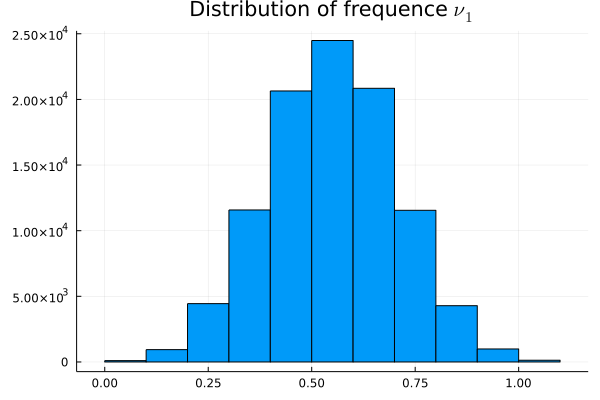

In [111]:
using Plots
hv1=histogram(v1, nbins=11, title=L"Distribution of frequence $\nu_1$", legend = false)


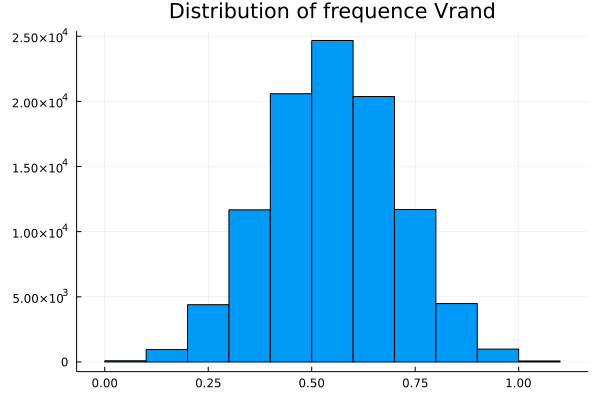

In [29]:
hvrand=histogram(vrand, nbins=11,  title=L"Distribution of frequence $\nu_{rand}$", legend = false)


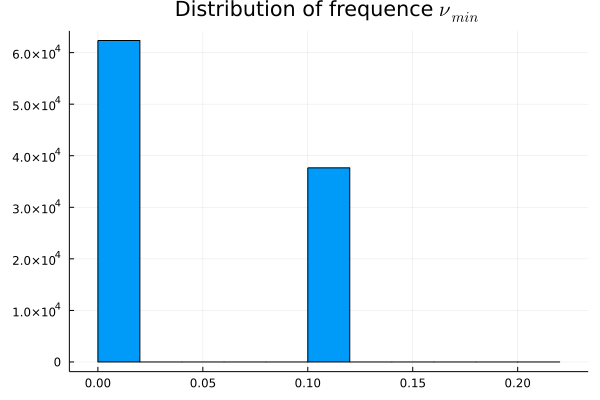

In [113]:
hvmin= histogram(vmin, nbins=11,  title=L"Distribution of frequence $\nu_{min}$", legend = false)

The instances of $c_{min}$ and $c_{rand}$ of the first three runs of the experiment are the following.

In [154]:
println(L"$c_{min}$ of first three runs: ")

for i in 1:3
    println(i,": ", cmin[i])
end

println(L"$c_{rand}$ of first three runs: ")
for i in 1:3
    println(i,": ", crand[i])
end

DFSim_1= DataFrame("c_min"=> [cmin[1], cmin[2], cmin[3]], "c_rand"=> [crand[1], crand[2], crand[3]])
#myfavoriteanimals = (bird = "penguins", mammal = "cats", marsupial = "sugargliders")


$c_{min}$ of first three runs: 
1: 268
2: 28
3: 106
$c_{rand}$ of first three runs: 
1: 379
2: 710
3: 792


,c_min,c_rand
,Int64,Int64
1,268,379
2,28,710
3,106,792


Thus, they may differ from one run to another. 

(c) Since every frequence $\nu$ corresponds to a sample of 10 datapoints, the Hoeffding bound in this experiment will be given by 
$$ \mathbb{P}[|\nu-\mu|>\epsilon]<2 e^{-20 \epsilon^{2}}.$$

Now for some values of $\epsilon>0$, we plot this Hoeffding bound along with our resulting estimates for $ \mathbb{P}[|\nu_{1}-\mu|$, $ \mathbb{P}[|\nu_{rand}-\mu|$ and $ \mathbb{P}[|\nu_{min}-\mu|$ which correspond to the $c_1$, $c_{rand}$, and $c_{min}$ coins respectively. 

In [130]:
eps=0:0.05:0.55
Ev1=abs.(v1.-0.5)
Evrand=abs.(vrand.-0.5)
Evmin=abs.(vmin.-0.5)

p1,prand,pmin= [], [], []
for i in eps
    p1    =push!(p1   ,sum(Ev1.>i))
    prand =push!(prand   ,sum(Evrand.>i))
    pmin  =push!(pmin   ,sum(Evmin.>i))
end

p1    =p1  /100000;
prand =prand/100000;
pmin  =pmin /100000;

HoeffIneq=2*exp.((eps.^2).*(-20));

┌ Warning: Skipped marker arg o.
└ @ Plots C:\Users\Ramos\.julia\packages\Plots\rDbWY\src\args.jl:1230


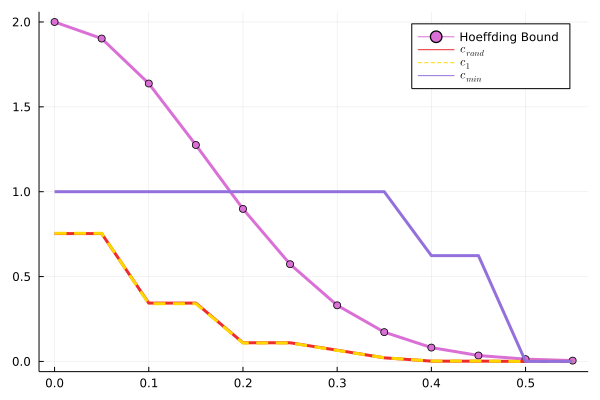

In [215]:
pminTit=L"$\mathbb{P}[|\nu-\mu|>\epsilon]$"

plot(eps, HoeffIneq, marker="o", markerfacecolor="blue", label="Hoeffding Bound",color="orchid",lw = 3)
plot!(eps, prand, label=L"c_{rand}",color="firebrick2",lw = 3)
plot!(eps, p1, label=L"c_{1}", color="gold",lw = 3, line=:dash)

plot!(eps, pmin, label=L"c_{min}", color="mediumpurple",lw = 3)



(d) The coins that obeyed the Hoeffding Inequality are the first coin ($c_1$) and the random coin ($c_{rand}$), while the coin with the minimum frequency of heads ($c_{min}$) didn't. This happens because when we flip the first coin ten times, we are collecting a random sample of ten datapoints which follow the binomial distribution with $p=0.5$. That is, from a bin whose half of balls are green, we're collecting a sample of ten balls, so the probability of the difference between $\mu$ and $\nu$ being larger than $\epsilon>0$ will certainly follow the Hoeffding bound. The same case holds for the coin that is chosen randomly.

However, the coin with the minimum frequency isn't chosen randomly at each run of the experiment. From the set of coins, which are all samples of ten datapoints (the results from flipping the coins), we're selecting the one with least $\nu$, and from a big sample of 1000 partitioned by some subsamples of 10 datapoints, the probability of at least one of them having $\nu\leq 0.1$, or just a low frequence increases drastically than just considering a single random sample.

(e) The way the previous experiment realtes to the multiple bins is as follows. Each of the 1000 coins represents a sample drawn from a bin of ifinite balls, each of them having a $50\%$ chance of being green or red. Then $c_1$ and $c_{rand}$ are random samples from the bin, and therefore the Hoeffding inequality holds for them. Now, the way we select coin $c_{min}$ each time is always by considering all coins (samples) and choosing the one with least $\nu$ (the one with least heads, or with maximum number of green balls). As the bin has infinite balls we may consider it the same way we would with 1000 equal bins, and therefore the process of selecting $\nu_{min}$ is the same as the case we had with the multiple bins. 

## Exercise 1.11
We are given a data set $\mathcal{D}$ of 25 training examples from an unknown target function $f: \mathcal{X} \rightarrow \mathcal{Y}$, where $\mathcal{X}=\mathbb{R}$ and $\mathcal{Y}=\{-1,+1\}$. To learn $f$, we use a simple hypothesis set $\mathcal{H}=\left\{h_{1}, h_{2}\right\}$ where $h_{1}$ is the constant $+1$ function and $h_{2}$ is the constant $-1$.

We consider two learning algorithms, $S$ (smart) and $C$ (crazy). $S$ chooses the hypothesis that agrees the most with $\mathcal{D}$ and $C$ chooses the other hypothesis deliberately. Let us see how these algorithms perform out of sample from the deterministic and probabilistic points of view. Assume in the probabilistic view that there is a probability distribution on $\mathcal{X}$, and let $\mathbb{P}[f(\mathbf{x})=+1]=p$.

(a) Can $S$ produce a hypothesis that is guaranteed to perform better than random on any point outside $\mathcal{D}$ ?

(b) Assume for the rest of the exercise that all the examples in $\mathcal{D}$ have $y_{n}=+1$. Is it possible that the hypothesis that $C$ produces turns out to be better than the hypothesis that $S$ produces?

(c) If $p=0.9$, what is the probability that $S$ will produce a better hypothesis than C?

(d) Is there any value of $p$ for which it is more likely than not that $C$ will produce a better hypothesis than $S$?


## Solution

(a) Not unless $p=1$. That's because data set $\mathcal{D}$ could not be a representative sample of the function, since all the information we have is a probability distribution of $\mathcal{X}$.

(b) Yes, it is possible, even if the probability of this happening is not very high.

(c) The probability that $S$ will produce a better hypothesis when $p=0.9$ is given by

$$\sum_{i=13}^{25} 
\left(\begin{array}{l}
25 \\
\hspace{1.5mm}i
\end{array}\right)
0.9^i0.1^{25-i} $$ 

assuming that when $\mathcal{D}$ has an equal number of values $+1$ and $-1$ then $S$ chooses the constant function +1. In order to calculate it we run the following code:

In [7]:
s=0

for i in 13:25
   s+= binomial(25,i)*0.9^i*0.1^(25-i)
end

s=round(s,digits=7)

println("The probability that S will produce a better hypothesis is $s.")

The probability that S will produce a better hypothesis is 0.9999998.


(d) No, the probability that $C$ will produce a better hypothesis than $S$ is always less than the opposite case, no matter the value that $p$ takes.

## Exercise 1.12
A friend comes to you with a learning problem. She says the target function $f$ is completely unknown, but she has 4,000 data points. She is willing to pay you to solve her problem and produce for her a $g$ which approximates $f$. What is the best that you can promise her among the following:

(a) After learning you will provide her with a $g$ that you will guarantee approximates $f$ well out of sample.

(b) After learning you will provide her with a $g$, and with high probability the $g$ which you produce will approximate $f$ well out of sample.

(c) One of two things will happen.$\\$ (i) You will produce a hypothesis $g$; (ii)You will declare that you failed.
    
   If you do return a hypothesis $g$, then with high probability the $g$ which you produce will approximate $f$ well out of         sample.


## Solution

The best I can promise her is (c), since I wouldn't be able to find out anything that will be $100\%$ certain about the function $f$ outside the sample, and I can't either guarantee that from my hypothesis space I will find a function that approximates it well enough within the sample.